In [1]:
import csv

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')
train,test

(       age           job   marital            education  default  housing  \
 id                                                                          
 1       51        admin.  divorced  professional.course       no      yes   
 2       50      services   married          high.school  unknown      yes   
 3       48   blue-collar  divorced             basic.9y       no       no   
 4       26  entrepreneur    single          high.school      yes      yes   
 5       45        admin.    single    university.degree       no       no   
 ...    ...           ...       ...                  ...      ...      ...   
 22496   33        admin.   married          high.school       no       no   
 22497   34        admin.  divorced          high.school       no  unknown   
 22498   25        admin.   married  professional.course       no      yes   
 22499   57       retired   married          high.school       no      yes   
 22500   44   blue-collar   married             basic.9y  unknow

(       age           job   marital            education  default  housing  \
 id                                                                          
 1       51        admin.  divorced  professional.course       no      yes   
 2       50      services   married          high.school  unknown      yes   
 3       48   blue-collar  divorced             basic.9y       no       no   
 4       26  entrepreneur    single          high.school      yes      yes   
 5       45        admin.    single    university.degree       no       no   
 ...    ...           ...       ...                  ...      ...      ...   
 22496   33        admin.   married          high.school       no       no   
 22497   34        admin.  divorced          high.school       no  unknown   
 22498   25        admin.   married  professional.course       no      yes   
 22499   57       retired   married          high.school       no      yes   
 22500   44   blue-collar   married             basic.9y  unknow

In [4]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22500 entries, 1 to 22500
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               22500 non-null  int64  
 1   job               22500 non-null  object 
 2   marital           22500 non-null  object 
 3   education         22500 non-null  object 
 4   default           22500 non-null  object 
 5   housing           22500 non-null  object 
 6   loan              22500 non-null  object 
 7   contact           22500 non-null  object 
 8   month             22500 non-null  object 
 9   day_of_week       22500 non-null  object 
 10  duration          22500 non-null  int64  
 11  campaign          22500 non-null  int64  
 12  pdays             22500 non-null  int64  
 13  previous          22500 non-null  int64  
 14  poutcome          22500 non-null  object 
 15  emp_var_rate      22500 non-null  float64
 16  cons_price_index  22500 non-null  float64
 17

(None, None)

In [5]:
train.shape,test.shape

((22500, 21), (7500, 20))

In [6]:
train.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,40.407511,1146.303733,3.364800,773.991956,1.316444,0.078529,93.548785,-39.877180,3.302490,5137.211285
std,12.086078,1432.432125,7.223837,326.934334,1.918733,1.573831,2.805786,5.805442,1.611777,170.670611
min,16.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,87.640000,-53.280000,0.600000,4715.420000
25%,32.000000,143.000000,1.000000,557.750000,0.000000,-1.800000,91.190000,-44.160000,1.430000,5008.510000
50%,38.000000,353.000000,1.000000,964.000000,0.000000,1.100000,93.540000,-40.600000,3.920000,5133.955000
75%,47.000000,1873.000000,3.000000,1005.000000,2.000000,1.400000,95.920000,-35.797500,4.830000,5267.677500
max,101.000000,5149.000000,57.000000,1048.000000,6.000000,1.400000,99.460000,-25.550000,5.270000,5489.500000


In [7]:
test.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,40.394800,1141.479467,3.439867,778.854133,1.307867,0.092813,93.491896,-39.926135,3.299045,5140.094701
std,12.082417,1412.822068,7.306611,324.827695,1.917770,1.561332,2.820470,5.841231,1.614954,170.710093
min,16.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,87.590000,-53.340000,0.610000,4720.660000
25%,31.000000,143.000000,1.000000,583.750000,0.000000,-1.800000,91.100000,-44.242500,1.420000,5008.510000
50%,38.000000,357.000000,1.000000,964.000000,0.000000,1.100000,93.440000,-40.635000,3.920000,5139.220000
75%,47.000000,1879.250000,3.000000,1005.000000,2.000000,1.400000,95.860000,-35.750000,4.830000,5272.845000
max,99.000000,5106.000000,57.000000,1048.000000,6.000000,1.400000,99.390000,-25.650000,5.270000,5489.500000


In [8]:
numerical_feature = list(test.select_dtypes(exclude='object').columns)
categorical_feature = list(test.select_dtypes(include='object').columns)

numerical_feature, categorical_feature

(['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp_var_rate',
  'cons_price_index',
  'cons_conf_index',
  'lending_rate3m',
  'nr_employed'],
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'])

In [9]:
for f in categorical_feature:
    print(f'{f} has {train[f].nunique()} unique values')

job has 12 unique values
marital has 4 unique values
education has 8 unique values
default has 3 unique values
housing has 3 unique values
loan has 3 unique values
contact has 2 unique values
month has 10 unique values
day_of_week has 5 unique values
poutcome has 3 unique values


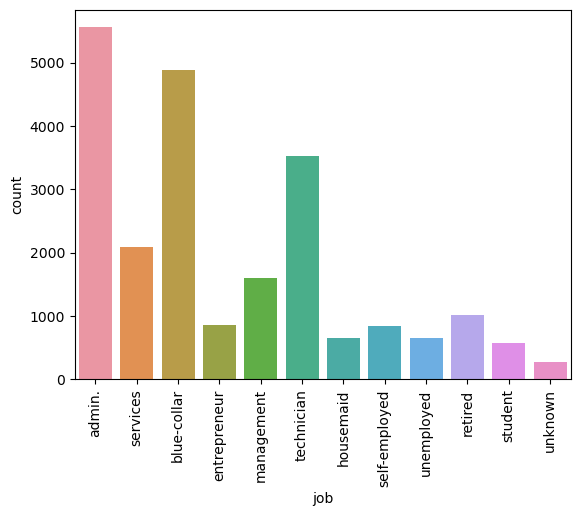

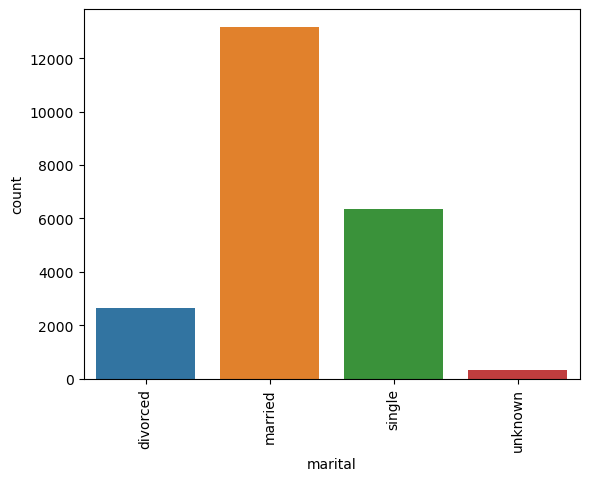

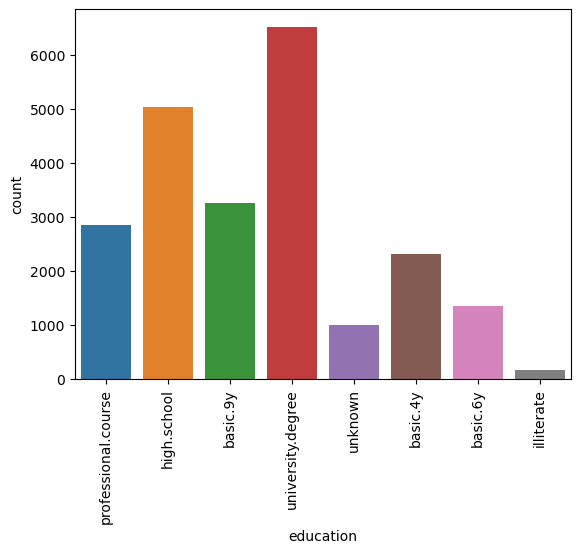

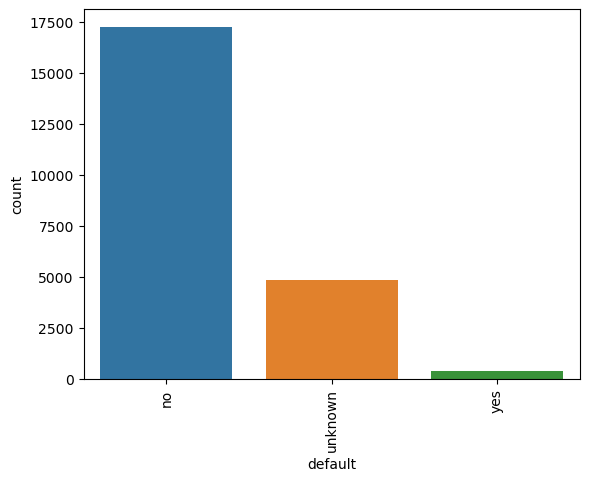

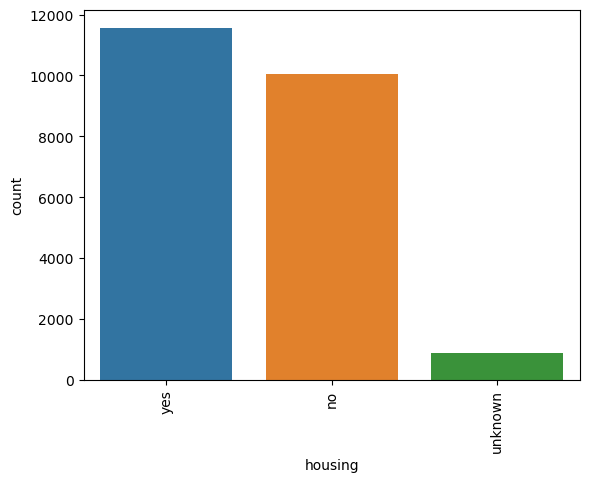

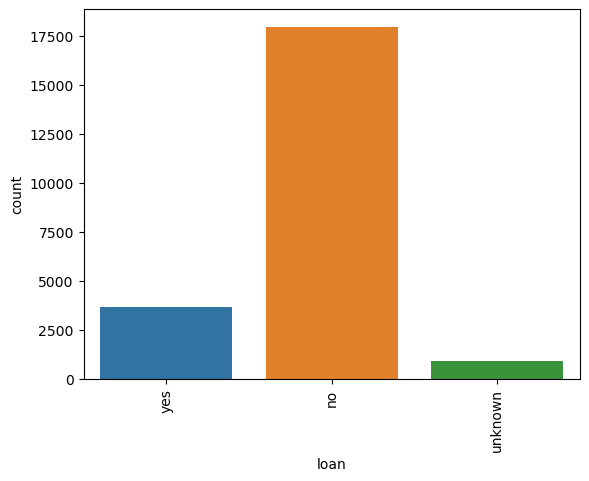

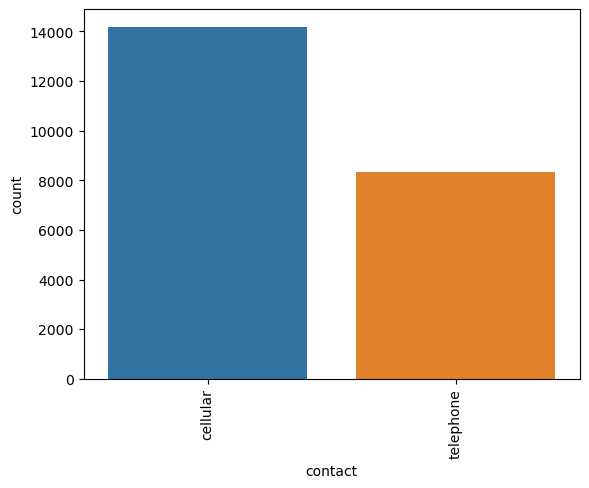

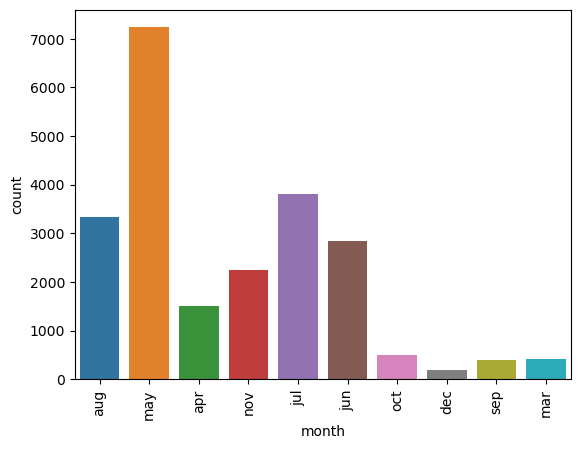

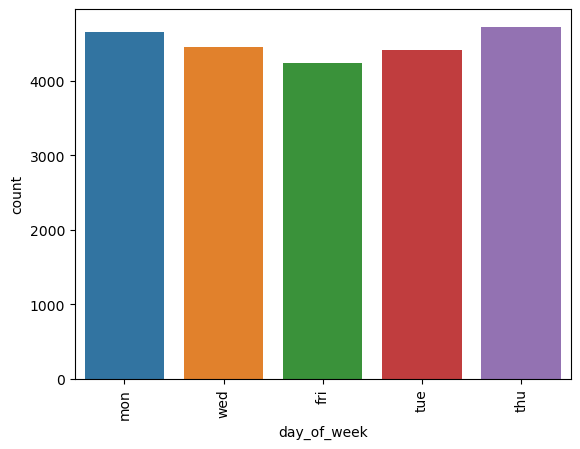

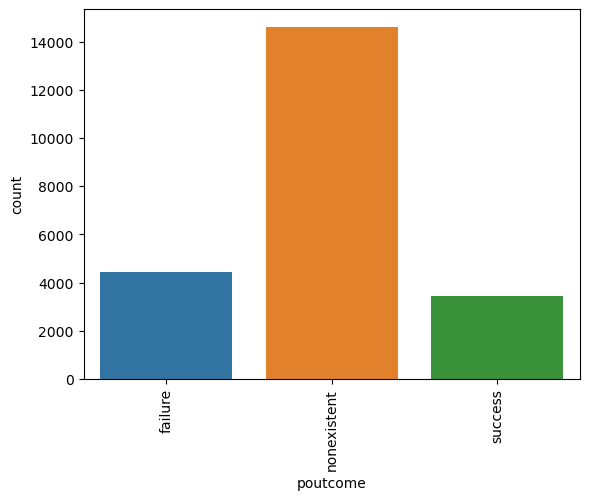

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


for f in categorical_feature:
    sns.countplot(x=f, data=train)
    plt.xticks(rotation=90)
    plt.show()

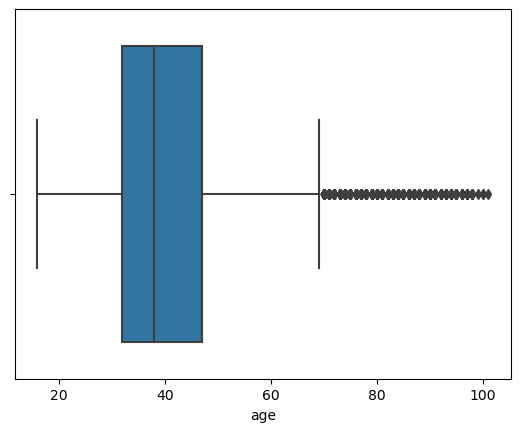

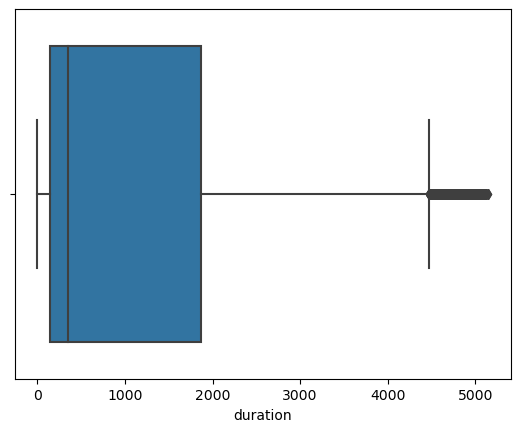

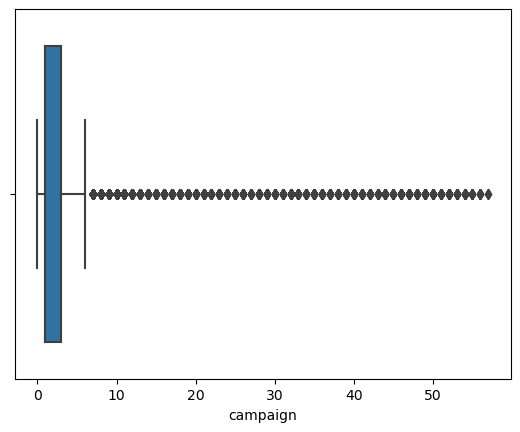

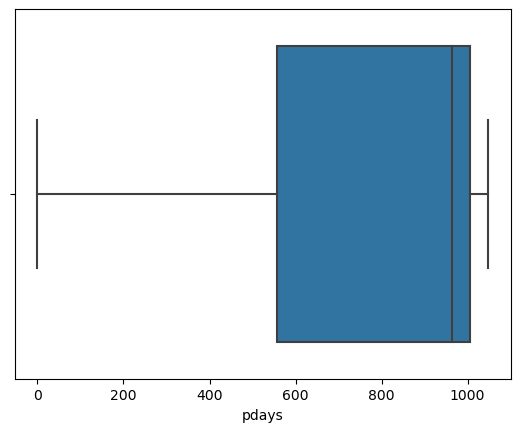

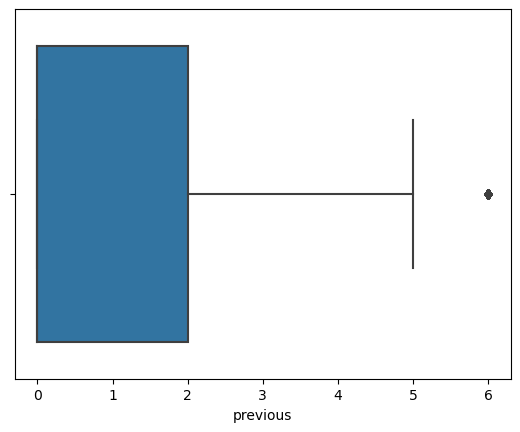

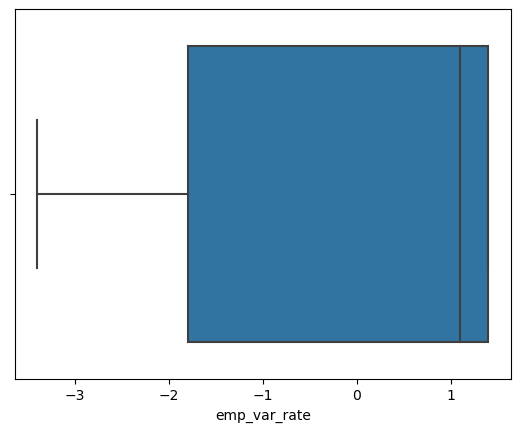

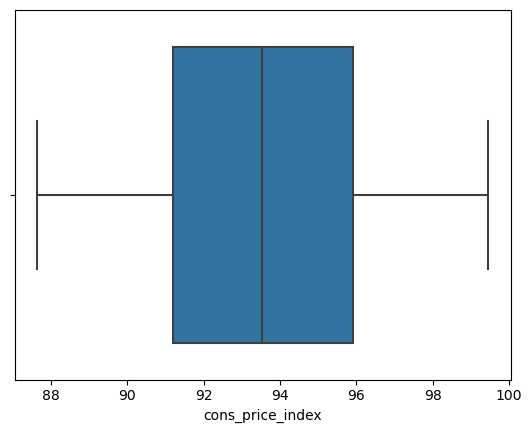

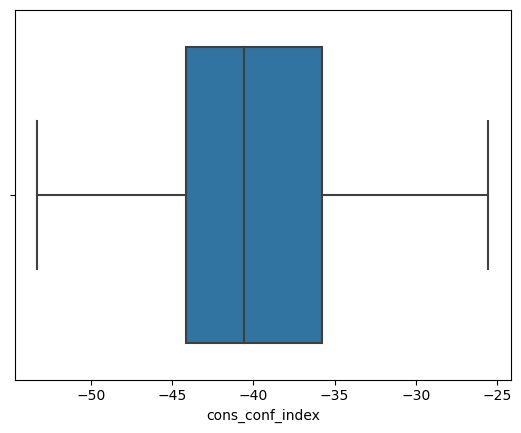

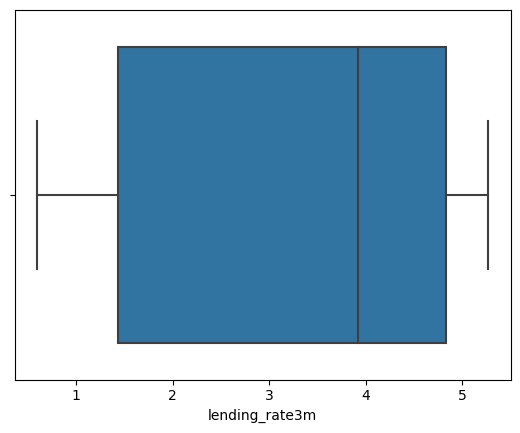

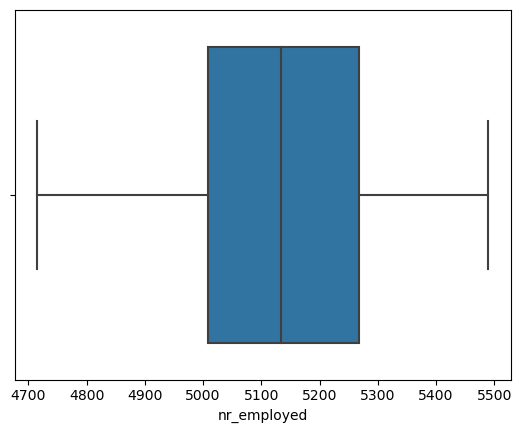

In [11]:
for f in numerical_feature:
    sns.boxplot(x=f, data=train)
    plt.show()

In [12]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

target = label_encoder.fit_transform(train.pop('subscribe'))


train[categorical_feature] = ordinal_encoder.fit_transform(train[categorical_feature])
test[categorical_feature] =ordinal_encoder.fit_transform(test[categorical_feature])

train.head(), target

(    age  job  marital  education  default  housing  loan  contact  month  \
 id                                                                         
 1    51  0.0      0.0        5.0      0.0      2.0   2.0      0.0    1.0   
 2    50  7.0      1.0        3.0      1.0      2.0   0.0      0.0    6.0   
 3    48  1.0      0.0        2.0      0.0      0.0   0.0      0.0    0.0   
 4    26  2.0      2.0        3.0      2.0      2.0   2.0      0.0    1.0   
 5    45  0.0      2.0        6.0      0.0      0.0   0.0      0.0    7.0   
 
     day_of_week  duration  campaign  pdays  previous  poutcome  emp_var_rate  \
 id                                                                             
 1           1.0      4621         1    112         2       0.0           1.4   
 2           1.0      4715         1    412         2       1.0          -1.8   
 3           4.0       171         0   1027         1       0.0          -1.8   
 4           0.0       359        26    998         0 

In [17]:
# 归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train=scaler.fit_transform(train)
test=scaler.fit_transform(test)

print(train)

[[ 0.8764402  -1.05189393 -1.83968264 ...  0.74882794 -1.62091153
   0.48356626]
 [ 0.79369853  0.88725694 -0.29666991 ... -0.12106489  0.46379014
  -0.95168637]
 [ 0.6282152  -0.77487237 -1.83968264 ... -0.83764987 -1.11834952
  -0.67149131]
 ...
 [-1.27484317 -1.05189393 -0.29666991 ...  0.53867561  0.46379014
  -0.13424569]
 [ 1.37289021  0.33321384 -0.29666991 ...  0.33024584  1.02219238
   0.86260889]
 [ 0.29724852 -0.77487237 -0.29666991 ... -1.08914364 -1.14937186
   0.10534394]]
<class 'numpy.ndarray'>


In [20]:
# 计算皮尔森相关系数
p_train=train.T
print(p_train.shape)
from scipy.stats import pearsonr
for i in range(0,len(p_train)):
    for j in range(i+1,len(p_train)):
        r=pearsonr(p_train[i],p_train[j])
        if(abs(r[0])>0.5):
            print(i,j,r[0])

print("Done pearsonr")

(20, 22500)
10 12 -0.5254514665533215
10 13 0.5412253715322823
12 13 -0.558189933945216
15 18 0.6237795165673179
Done pearsonr


In [64]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import joblib

def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 15, 255),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'verbose': 0
    }

    cla = LGBMClassifier(**params)

    f1score = cross_val_score(cla, train, target, cv=5, scoring='f1').mean()

    return f1score


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

print("Best trial parameters:", study.best_trial.params)
print("Best Matthews Correlation Coefficient:", study.best_value)

# Retrieve the best parameters from the Optuna study
best_params = study.best_params


# Train the final model on the entire training set
cla = LGBMClassifier(**best_params)
x_train, x_test, y_train, y_test = train_test_split(train, target)
cla.fit(x_train, y_train)

train_score = cla.score(x_train, y_train)
test_score = cla.score(x_test, y_test)

joblib.dump(cla, 'lgbm_model.pkl')

print(f'train score {train_score} \n test score {test_score}')

[I 2024-10-31 14:17:18,553] A new study created in memory with name: no-name-a357aa2a-a400-4cb3-800b-c2f8586f6b68
[I 2024-10-31 14:17:21,104] Trial 0 finished with value: 0.0 and parameters: {'num_leaves': 128, 'learning_rate': 0.0007778275630972396, 'n_estimators': 183, 'subsample': 0.5371166962524956, 'colsample_bytree': 0.22830062697860334}. Best is trial 0 with value: 0.0.
[I 2024-10-31 14:17:24,248] Trial 1 finished with value: 0.0 and parameters: {'num_leaves': 44, 'learning_rate': 0.00020862890012148528, 'n_estimators': 473, 'subsample': 0.6663987262582907, 'colsample_bytree': 0.3109520913043312}. Best is trial 0 with value: 0.0.
[I 2024-10-31 14:17:25,685] Trial 2 finished with value: 0.0 and parameters: {'num_leaves': 37, 'learning_rate': 0.0005841073167088887, 'n_estimators': 263, 'subsample': 0.577908856489042, 'colsample_bytree': 0.18501618276197246}. Best is trial 0 with value: 0.0.
[I 2024-10-31 14:17:32,443] Trial 3 finished with value: 0.0 and parameters: {'num_leaves':

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 14:19:08,560] Trial 30 finished with value: 0.04016779114744287 and parameters: {'num_leaves': 213, 'learning_rate': 0.0053888793387301265, 'n_estimators': 356, 'subsample': 0.7318456554189703, 'colsample_bytree': 0.12680423712305106}. Best is trial 16 with value: 0.43289014730299724.
[I 2024-10-31 14:19:10,686] Trial 31 finished with value: 0.4314747140305806 and parameters: {'num_leaves': 56, 'learning_rate': 0.02387619892710509, 'n_estimators': 235, 'subsample': 0.6696887910293833, 'colsample_bytree': 0.8301893198006483}. Best is trial 16 with value: 0.43289014730299724.
[I 2024-10-31 14:19:13,243] Trial 32 finished with value: 0.42543297747837505 and parameters: {'num_leaves': 52, 'learning_rate': 0.020615070955034752, 'n_estimators': 308, 'subsample': 0.6659233977065308, 'colsample_bytree': 0.760883606421336}. Best is trial 16 with value: 0.43289014730299724.
[I 2024-10-31 14:19:14,758] Trial 33 finished with value: 0.41762457854954455 and parameters: {'num_leaves': 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 14:20:25,820] Trial 50 finished with value: 0.32953497516640096 and parameters: {'num_leaves': 116, 'learning_rate': 0.014076254588929825, 'n_estimators': 444, 'subsample': 0.8332136807395942, 'colsample_bytree': 0.22025556187633766}. Best is trial 39 with value: 0.43438917500786534.
[I 2024-10-31 14:20:30,092] Trial 51 finished with value: 0.42630507285989816 and parameters: {'num_leaves': 82, 'learning_rate': 0.0302697502963119, 'n_estimators': 397, 'subsample': 0.645399152838936, 'colsample_bytree': 0.814345554082816}. Best is trial 39 with value: 0.43438917500786534.
[I 2024-10-31 14:20:35,230] Trial 52 finished with value: 0.20920553496980202 and parameters: {'num_leaves': 102, 'learning_rate': 0.0031268140424652547, 'n_estimators': 375, 'subsample': 0.6005954351198793, 'colsample_bytree': 0.9193084613860472}. Best is trial 39 with value: 0.43438917500786534.
[I 2024-10-31 14:20:38,041] Trial 53 finished with value: 0.3788907373607597 and parameters: {'num_leaves': 4

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-31 14:23:22,039] Trial 110 finished with value: 0.22675738802682516 and parameters: {'num_leaves': 200, 'learning_rate': 0.016280381220229727, 'n_estimators': 188, 'subsample': 0.8149412127755943, 'colsample_bytree': 0.2694151976564684}. Best is trial 85 with value: 0.4467462624452061.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-31 14:23:24,279] Trial 111 finished with value: 0.4399512898256036 and parameters: {'num_leaves': 161, 'learning_rate': 0.04579973301557239, 'n_estimators': 111, 'subsample': 0.7632185152428784, 'colsample_bytree': 0.961145798110196}. Best is trial 85 with value: 0.4467462624452061.
[I 2024-10-31 14:23:26,741] Trial 112 finished with value: 0.4372933789532093 and parameters: {'num_leaves': 175, 'learning_rate': 0.04892442764388521, 'n_estimators': 116, 'subsample': 0.7484813476666795, 'colsample_bytree': 0.9612797517415232}. Best is trial 85 with value: 0.4467462624452061.
[I 2024-10-31 14:23:28,989] Trial 113 finished with value: 0.43856951356595947 and parameters: {'num_leaves': 161, 'learning_rate': 0.048872941005382545, 'n_estimators': 116, 'subsample': 0.7513101188283353, 'colsample_bytree': 0.9629585228524258}. Best is trial 85 with value: 0.4467462624452061.
[I 2024-10-31 14:23:31,237] Trial 114 finished with value: 0.43320469209461454 and parameters: {'num_leaves': 1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-31 14:24:25,319] Trial 137 finished with value: 0.21501393094225518 and parameters: {'num_leaves': 169, 'learning_rate': 0.04289681479846222, 'n_estimators': 133, 'subsample': 0.853911279815252, 'colsample_bytree': 0.10596678690598671}. Best is trial 85 with value: 0.4467462624452061.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-10-31 14:24:28,264] Trial 138 finished with value: 0.4253170754108201 and parameters: {'num_leaves': 150, 'learning_rate': 0.0667515205844433, 'n_estimators': 164, 'subsample': 0.789368108634213, 'colsample_bytree': 0.9530996128477157}. Best is trial 85 with value: 0.4467462624452061.
[I 2024-10-31 14:24:31,196] Trial 139 finished with value: 0.43416002384769764 and parameters: {'num_leaves': 160, 'learning_rate': 0.049501415586664106, 'n_estimators': 155, 'subsample': 0.7193332273273081, 'colsample_bytree': 0.9764390035311437}. Best is trial 85 with value: 0.4467462624452061.
[I 2024-10-31 14:24:34,111] Trial 140 finished with value: 0.4386415928375353 and parameters: {'num_leaves': 166, 'learning_rate': 0.03611217794912772, 'n_estimators': 146, 'subsample': 0.8307265927817732, 'colsample_bytree': 0.883709917183686}. Best is trial 85 with value: 0.4467462624452061.
[I 2024-10-31 14:24:37,013] Trial 141 finished with value: 0.43417827188834063 and parameters: {'num_leaves': 165

Best trial parameters: {'num_leaves': 156, 'learning_rate': 0.041965253111443356, 'n_estimators': 138, 'subsample': 0.8143873493140596, 'colsample_bytree': 0.9565412510447763}
Best Matthews Correlation Coefficient: 0.4467462624452061
train score 0.9906962962962963 
 test score 0.8801777777777777


In [65]:
from xgboost import XGBClassifier


def objective(trial):
    params = {
        'max_depth': trial.suggest_int('num_leaves', 3, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'verbose': 0
    }

    cla = XGBClassifier(**params)

    f1score = cross_val_score(cla, train, target, cv=5, scoring='f1').mean()

    return f1score


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

print("Best trial parameters:", study.best_trial.params)
print("Best Matthews Correlation Coefficient:", study.best_value)

# Retrieve the best parameters from the Optuna study
best_params = study.best_params

cla_xgb = XGBClassifier(**best_params)
cla_xgb.fit(x_train, y_train)

train_score = cla_xgb.score(x_train, y_train)
test_score = cla_xgb.score(x_test, y_test)

joblib.dump(cla_xgb, 'xgb_model.pkl')

print(f'train score {train_score} \n test score {test_score}')


[I 2024-10-31 14:27:13,712] A new study created in memory with name: no-name-992b4621-a71c-4a06-81ec-e759dd7e8087
[I 2024-10-31 14:27:14,754] Trial 0 finished with value: 0.0 and parameters: {'num_leaves': 5, 'learning_rate': 4.5420681933389906e-05, 'n_estimators': 170, 'subsample': 0.5393336225481169, 'colsample_bytree': 0.6471513493835709}. Best is trial 0 with value: 0.0.
[I 2024-10-31 14:27:17,153] Trial 1 finished with value: 0.0 and parameters: {'num_leaves': 7, 'learning_rate': 0.0002687683535878209, 'n_estimators': 282, 'subsample': 0.5810701539919705, 'colsample_bytree': 0.8294699041598725}. Best is trial 0 with value: 0.0.
[I 2024-10-31 14:27:19,304] Trial 2 finished with value: 0.4224012013255134 and parameters: {'num_leaves': 4, 'learning_rate': 0.05200453642504956, 'n_estimators': 459, 'subsample': 0.8652886129108639, 'colsample_bytree': 0.3836096983954098}. Best is trial 2 with value: 0.4224012013255134.
[I 2024-10-31 14:27:24,309] Trial 3 finished with value: 0.0 and par

Best trial parameters: {'num_leaves': 5, 'learning_rate': 0.08604312752770567, 'n_estimators': 393, 'subsample': 0.7484054808320165, 'colsample_bytree': 0.9002924035826438}
Best Matthews Correlation Coefficient: 0.44603793808703324
train score 0.9876148148148148 
 test score 0.8798222222222222


In [66]:
test_data=pd.read_csv("test.csv",index_col='id')
id_list=test_data.index.tolist()
categorical_feature = list(test_data.select_dtypes(include='object').columns)
test_data[categorical_feature] =ordinal_encoder.fit_transform(test_data[categorical_feature])
test_data=scaler.fit_transform(test_data)
print(test_data)


[[-0.44652984  1.4470523   1.23559448 ...  1.17896272  0.20494495
   0.37753828]
 [-1.19146359 -1.05887489  1.23559448 ... -0.76938659 -0.08610436
  -1.26137274]
 [ 0.2984039  -0.78043854 -0.29994133 ...  0.51809907  1.07809289
  -1.1310847 ]
 ...
 [ 0.7950264   0.33330688  1.23559448 ...  0.04042819 -1.24410906
  -0.13646677]
 [-0.77761151  1.4470523  -0.29994133 ...  0.38455667  1.16478843
   0.02551454]
 [ 0.46394474 -1.05887489 -1.83547713 ...  1.43577502  0.30402557
  -0.33887017]]


In [67]:
loaded_model_lgbm = joblib.load('lgbm_model.pkl')
y_pred_lgbm_proba = loaded_model_lgbm.predict_proba(test_data)
y_pred_lgbm = loaded_model_lgbm.predict(test_data)

loaded_model_xgb = joblib.load('xgb_model.pkl')
y_pred_xgb_proba = loaded_model_xgb.predict_proba(test_data)
y_pred_xgb = loaded_model_xgb.predict(test_data)

In [68]:
import csv

with open("./submission/submission_lgbm.csv","w+",encoding="utf-8",newline="") as f:
    writer=csv.writer(f)
    writer.writerow(["id","subscribe"])
    for i in range(0,len(id_list)):
        writer.writerow([id_list[i],"yes" if(y_pred_lgbm[i]) else "no"])

print("Done submission_lgbm.csv")

with open("./submission/submission_xgb.csv","w+",encoding="utf-8",newline="") as f:
    writer=csv.writer(f)
    writer.writerow(["id","subscribe"])
    for i in range(0,len(id_list)):
        writer.writerow([id_list[i],"yes" if(y_pred_xgb[i]) else "no"])


Done submission_lgbm.csv
